In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
PREDICTIONS_DATASET_PATH = 'LBogdanov_predictions.csv'

In [3]:
df = pd.read_csv(TRAIN_DATASET_PATH)

In [4]:
df_test = pd.read_csv(TEST_DATASET_PATH)

In [5]:
df.shape

(10000, 12)

In [6]:
df

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [8]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


**Выделение целевой переменной и групп признаков**

In [9]:
TARGET_NAME = 'mean_exam_points'
BASE_FEATURE_NAMES = df.columns.drop([TARGET_NAME, 'Id']).tolist()
#NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

**Корреляция с базовыми признаками**

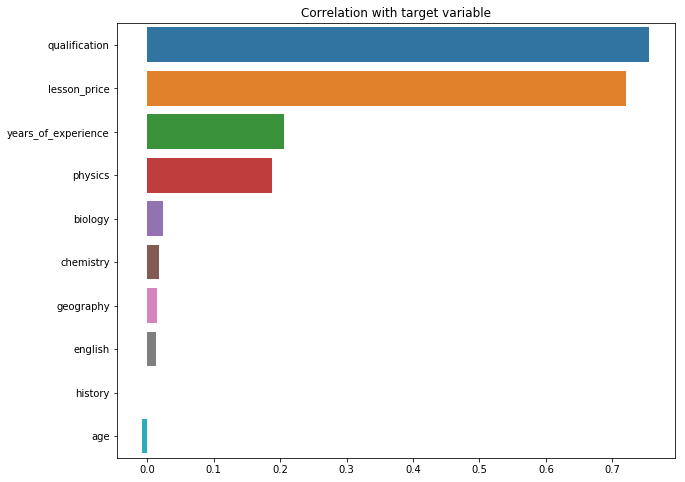

In [10]:
#corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

### Анализ признакового пространства<a class="anchor" id="features_analysis"></a>

**Матрица корреляций**

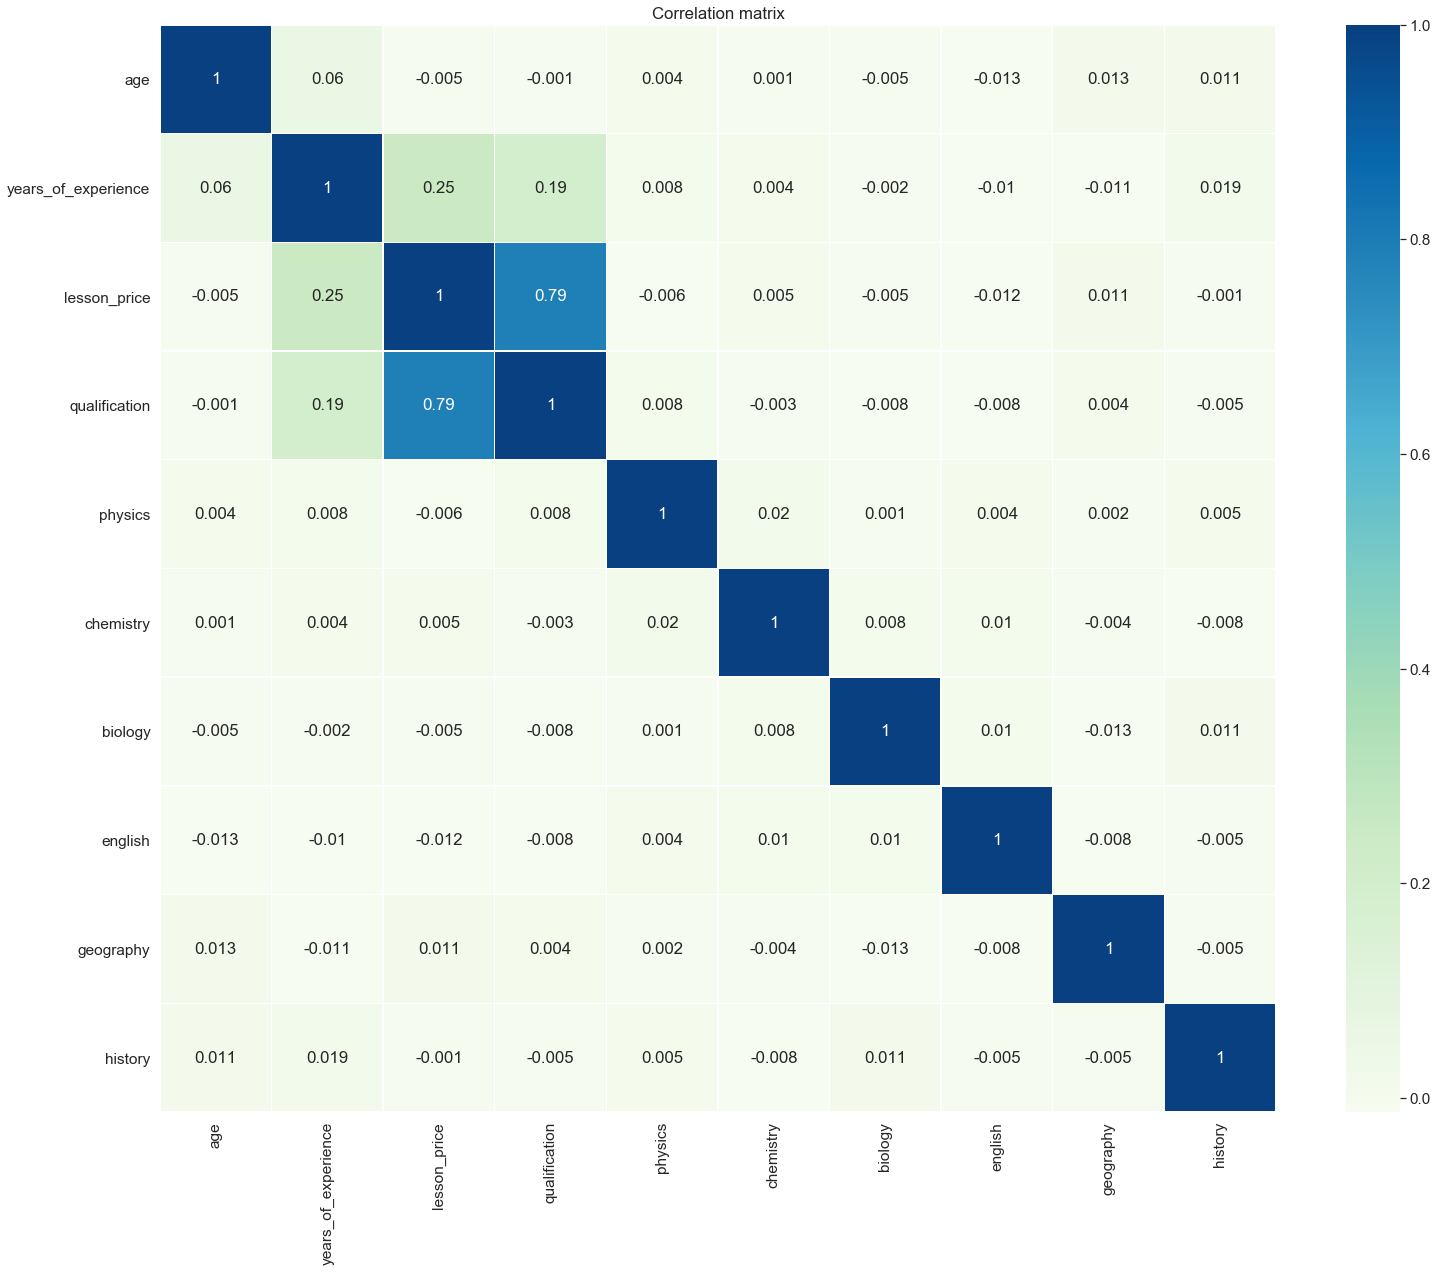

Wall time: 2.6 s


In [11]:
%%time
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Анализ и исправление признаков

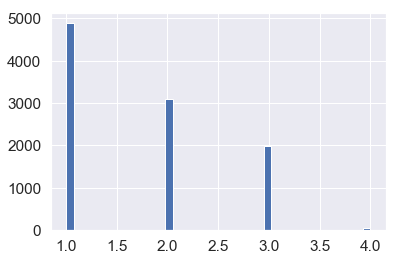

In [12]:
df.qualification.hist(bins=40)

In [18]:
df.loc[(df.qualification==3)&(df.mean_exam_points<70),'mean_exam_points'] = 70
# обрезать этот хвост?

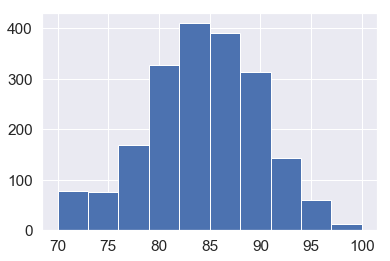

In [19]:
df.mean_exam_points[(df.qualification==3)].hist()

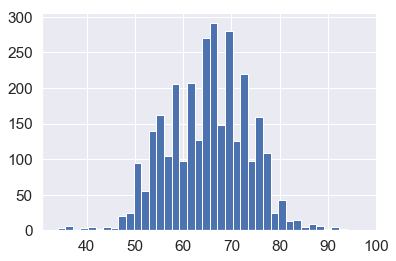

In [21]:
df.mean_exam_points[(df.qualification==2)].hist(bins=40)

In [22]:
df.loc[(df.qualification==2)&(df.mean_exam_points<45),'mean_exam_points'] = 45
df.loc[(df.qualification==2)&(df.mean_exam_points>90),'mean_exam_points'] = 90
# обрезать этот хвост?

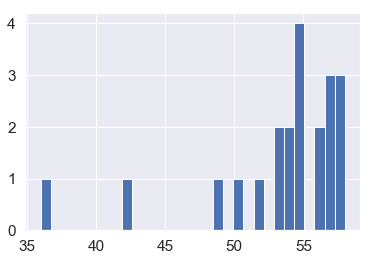

In [13]:
df.mean_exam_points[(df.qualification==3)&(df.mean_exam_points<60)].hist(bins=30)
# обрезать этот хвост?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE0C7CFD30>,
      dtype=object)

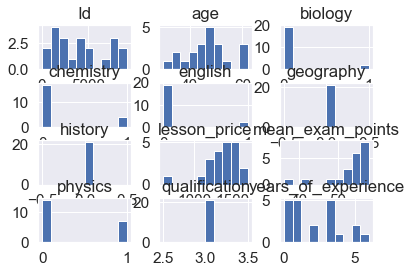

In [14]:
df[(df.qualification==3)&(df.mean_exam_points<60)].hist()

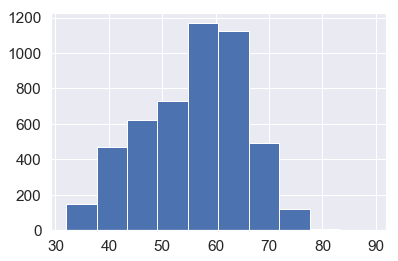

In [15]:
df.mean_exam_points[(df.qualification==1)&(df.mean_exam_points<160)].hist()

Пока модификацию исходных данных сделать не успеваю, надо попробовать пообрезать хвосты по каждой квалификации по отдельности(Сделано! дало прирост в полпроцента), возможно, как-то поработать с сильно скореллированными признаками lesson_price и  qualification. пока просто отбросим малозначимые признаки 

In [16]:
IMPORTANT_FEATURE_NAMES = ['years_of_experience', 'lesson_price', 'qualification', 'physics']   #'lesson_price', 'qualification',

# Построение дерева

In [17]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, left_branch, rigth_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.left_branch = left_branch  # поддерево, удовлетворяющее условию в узле
        self.rigth_branch = rigth_branch  # поддерево, не удовлетворяющее условию в узле

In [18]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets  # y_true
        self.prediction = self.predict()  # y_pred
        
    def predict(self):
        prediction = np.mean(self.targets)
        return prediction        

In [19]:
# Расчет критерия Джини

def gini(targets):
    #  подсчет количества объектов разных классов
    classes = {}
    for target in targets:
        if target not in classes:
            classes[target] = 0
        classes[target] += 1
    
    #  расчет критерия
    impurity = 1     # "impurity" - "нечистота", степень неопределенности
    for target in classes:
        p = classes[target] / len(targets)
        impurity -= p ** 2
        
    return impurity

def disp(targets):
    return np.var(targets)

In [20]:
# Расчет качества

def quality(left_targets, right_targets, current_disp):

    # доля выборки, ушедшей в левое поддерево
    p = float(left_targets.shape[0]) / (left_targets.shape[0] + right_targets.shape[0])
    
    return current_disp - p * disp(left_targets) - (1 - p) * disp(right_targets)

In [21]:
# Разбиение датасета в узле

def split(data, targets, index, t):
   
    left = (data.iloc[:, index] <= t)
    right = (data.iloc[:, index] > t)
        
    left_data = data[left]
    rigth_data = data[right]
    left_targets = targets[left]
    rigth_targets = targets[right]
        
    return left_data, rigth_data, left_targets, rigth_targets

In [22]:
# Нахождение наилучшего разбиения

def find_best_split(data, targets):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_disp = disp(targets)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = data.iloc[:, index].unique()  #[row[index] for row in data]
        
        for t in t_values:
            left_data, rigth_data, left_targets, rigth_targets = split(data, targets, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(left_data) < min_leaf or len(rigth_data) < min_leaf:
                continue
            
            current_quality = quality(left_targets, rigth_targets, current_disp)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [23]:
# Построение дерева с помощью рекурсивной функции
# *****************Добавим условия останова*************************************
def stop_conditions(quality, depth):
    return (quality == 0) or (depth == 0)

def build_tree(data, targets, max_depth = 7):

    quality, t, index = find_best_split(data, targets)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if stop_conditions(quality, max_depth):   #quality == 0:
        return Leaf(data, targets)

    left_data, rigth_data, left_targets, rigth_targets = split(data, targets, index, t)

    # Рекурсивно строим два поддерева
    left_branch = build_tree(left_data, left_targets, max_depth-1)
    rigth_branch = build_tree(rigth_data, rigth_targets, max_depth-1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, left_branch, rigth_branch)

In [24]:
# Проход объекта по дереву для его классификации

def predict_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer
    if obj[node.index] <= node.t:
        return predict_object(obj, node.left_branch)
    else:
        return predict_object(obj, node.rigth_branch)


In [25]:
# Предсказание деревом для всего датасета

def predict_tree(data, tree):
    prediction = data.apply(lambda obj: predict_object(obj, tree), axis=1)
   
    return prediction 

# Градиентный бустинг

In [26]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [27]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array(sum([eta* coef * predict_tree(X, tree) for tree, coef in zip(trees_list, coef_list)]))

In [28]:
def bias(y, z):
    return (y - z)

In [29]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train, max_depth=max_depth) #.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(X_train, bias(y_train, target), max_depth=max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        print(f'tree №{i} done!')
        
    return trees, train_errors, test_errors

# Построение и обучение моделей

## Разбиение на train/test

In [30]:
train_X, test_X, train_y, test_y = train_test_split(df[IMPORTANT_FEATURE_NAMES],
                                                                    df[TARGET_NAME], 
                                                                    test_size = 0.3,
                                                                    random_state = 1)

In [31]:
# Построим дерево по обучающей выборке
my_tree = build_tree(train_X, train_y, max_depth=6)

In [32]:
# Получим ответы для обучающей выборки 
train_prediction = predict_tree(train_X, my_tree)

In [33]:
# И получим ответы для тестовой выборки
test_prediction = predict_tree(test_X, my_tree)

In [34]:
print(f'Ошибка алгоритма на тренировочной выборке: {mean_squared_error(train_y, train_prediction)}')
print(f'Ошибка алгоритма на тестовой выборке: {mean_squared_error(test_y, test_prediction)}')

Ошибка алгоритма на тренировочной выборке: 39.32714098451425
Ошибка алгоритма на тестовой выборке: 42.61174700554867


Уже на одном дереве получаем неплохой результат. Теперь попробуем объединить деревья с помощью градиентного бустинга.

In [35]:
# Число деревьев в ансамбле
n_trees = 14


# для простоты примем коэффициенты равными 1
coefs = [0.9**p for p in range(n_trees)] # [1] * n_trees

# Максимальная глубина деревьев
max_depth = 6

# Шаг
eta = 0.6

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, train_X, test_X, train_y, test_y, coefs, eta)

tree №0 done!
tree №1 done!
tree №2 done!
tree №3 done!
tree №4 done!
tree №5 done!
tree №6 done!
tree №7 done!
tree №8 done!
tree №9 done!
tree №10 done!
tree №11 done!
tree №12 done!
tree №13 done!


In [36]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.ylim(0, 100)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

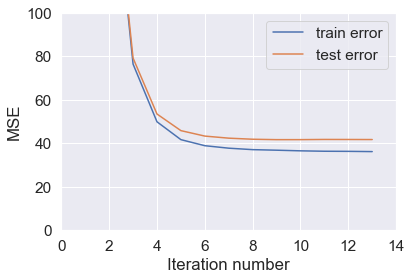

In [37]:
get_error_plot(n_trees, train_errors, test_errors)

In [38]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [39]:
evaluate_alg(train_X, test_X, train_y, test_y, trees, coefs, eta)

Ошибка алгоритма из 14 деревьев глубиной 6     с шагом 0.6 на тренировочной выборке: 36.16274702385252
Ошибка алгоритма из 14 деревьев глубиной 6     с шагом 0.6 на тестовой выборке: 41.72518915998799


# Получение итогового результата

In [40]:
final_prediction = pd.DataFrame(gb_predict(df_test[IMPORTANT_FEATURE_NAMES], trees, coefs, eta), columns=['mean_exam_points'], index=range(10000))
#final_prediction = pd.DataFrame(predict_tree(df_test[BASE_FEATURE_NAMES], my_tree), columns=['mean_exam_points'], index=range(10000))

In [41]:
final_prediction['ID'] = final_prediction.index.tolist()

In [42]:
final_prediction['ID'] = final_prediction['ID']+10000

In [43]:
final_prediction[['ID', TARGET_NAME]].to_csv(PREDICTIONS_DATASET_PATH, index=False)